# Apriori


The Apriori algorithm is used for mining frequent itemsets and devising association rules from a transactional database. The parameters “support” and “confidence” are used. Support refers to items’ frequency of occurrence; confidence is a conditional probability.

A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

1. All subsets of a frequent itemset must be frequent
2. Similarly, for any infrequent itemset, all its supersets must be infrequent too


###  Algorithm
The following are the main steps of the algorithm:

1. Calculate the support of item sets (of size k = 1) in the transactional database (note that support is the frequency of 
   occurrence of an itemset). This is called generating the candidate set.
2. Prune the candidate set by eliminating items with a support less than the given threshold.
3. Join the frequent itemsets to form sets of size k + 1, and repeat the above sets until no more itemsets can be formed. This 
   will happen when the set(s) formed have a support less than​ the given support.

### Libraries useful in Apriori are listed below

### Install library for apriori algorithm using:
!pip install mlxtend

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip3 install mlxtend

You should consider upgrading via the 'c:\users\vinay\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Load the "basket" data

In [41]:
# Load dataset and display first five rows.
basket = pd.read_csv("Basket Dataset\BASKETS1n")
basket.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F


In [42]:
basket.columns

Index(['cardid', 'value', 'pmethod', 'sex', 'homeown', 'income', 'age',
       'fruitveg', 'freshmeat', 'dairy', 'cannedveg', 'cannedmeat',
       'frozenmeal', 'beer', 'wine', 'softdrink', 'fish', 'confectionery'],
      dtype='object')

### Perform pre-processing (if required)

In [43]:
#selecting only products columns and replacing boolean values
l = ["cardid", "value","income", "age"]
for i in l:
    basket[l] = preprocessing.normalize( basket[l])
basket.head()


basket = basket.replace('T', 1)
basket = basket.replace('F', 0)

In [44]:
basket.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,0.827596,0.000888,CHEQUE,M,NO,0.561322,0.000956,0,1,1,0,0,0,0,0,0,0,1
1,0.913502,0.000344,CASH,0,NO,0.406833,0.000380,0,1,0,0,0,0,0,0,0,0,1
2,0.635755,0.001206,CASH,M,NO,0.771887,0.002105,0,0,0,1,0,1,1,0,0,1,0
3,0.909829,0.000806,CARD,0,NO,0.414981,0.000884,0,0,1,0,0,0,0,1,0,0,0
4,0.992868,0.000204,CARD,M,YES,0.119219,0.000260,0,0,0,0,0,0,0,0,0,0,0


### Q1. Find frequent itemsets in the dataset using Apriori

In [47]:
#apriori with min support 0.1 and confidence 0.1
l=['fruitveg', 'freshmeat', 'dairy', 'cannedveg', 'cannedmeat',
       'frozenmeal', 'beer', 'wine', 'softdrink', 'fish', 'confectionery']

s = apriori(basket[l], min_support=0.1, use_colnames=True)
print(s)

    support                       itemsets
0     0.299                     (fruitveg)
1     0.183                    (freshmeat)
2     0.177                        (dairy)
3     0.303                    (cannedveg)
4     0.204                   (cannedmeat)
5     0.302                   (frozenmeal)
6     0.293                         (beer)
7     0.287                         (wine)
8     0.184                    (softdrink)
9     0.292                         (fish)
10    0.276                (confectionery)
11    0.145               (fruitveg, fish)
12    0.173        (frozenmeal, cannedveg)
13    0.167              (beer, cannedveg)
14    0.170             (frozenmeal, beer)
15    0.144          (confectionery, wine)
16    0.146  (frozenmeal, cannedveg, beer)


### Q2. Find the assoiation rules in the dataset having min confidence 10%

In [53]:
# find rules
assoc = association_rules(s, min_threshold=0.1)
# print(assoc)
association_rules(s, min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fruitveg),(fish),0.299,0.292,0.145,0.484950,1.660787,0.057692,1.374623
1,(fish),(fruitveg),0.292,0.299,0.145,0.496575,1.660787,0.057692,1.392463
2,(frozenmeal),(cannedveg),0.302,0.303,0.173,0.572848,1.890586,0.081494,1.631736
3,(cannedveg),(frozenmeal),0.303,0.302,0.173,0.570957,1.890586,0.081494,1.626877
4,(beer),(cannedveg),0.293,0.303,0.167,0.569966,1.881075,0.078221,1.620802
5,(cannedveg),(beer),0.303,0.293,0.167,0.551155,1.881075,0.078221,1.575154
6,(frozenmeal),(beer),0.302,0.293,0.170,0.562914,1.921208,0.081514,1.617530
7,(beer),(frozenmeal),0.293,0.302,0.170,0.580205,1.921208,0.081514,1.662715
8,(confectionery),(wine),0.276,0.287,0.144,0.521739,1.817906,0.064788,1.490818
9,(wine),(confectionery),0.287,0.276,0.144,0.501742,1.817906,0.064788,1.453063


### Q3. Find association rules having minimum antecedent_len 2 & confidence greater than 0.75

In [72]:
#rules having minimum antecedent_len 2 and confidence greater than 0.75
index = []
for i in range (0, len(assoc)):
    if(len(assoc["antecedents"][i]) >= 2 and assoc["confidence"][i]>0.75):
        index.append(i)


In [75]:
# rules having minimum antecedent_len 2 and confidence greater than 0.75
assoc.iloc[index]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(frozenmeal, cannedveg)",(beer),0.173,0.293,0.146,0.843931,2.880309,0.095311,4.530037
11,"(frozenmeal, beer)",(cannedveg),0.170,0.303,0.146,0.858824,2.834401,0.094490,4.937083
12,"(beer, cannedveg)",(frozenmeal),0.167,0.302,0.146,0.874251,2.894873,0.095566,5.550762


### Load the "zoo" data

In [95]:
# load the dataset and display first five rows
file = open("Zoo Dataset\zoo.names", "rb")
for x in file:
    print(x)

b'1. Title: Zoo database\n'
b'\n'
b'2. Source Information\n'
b'   -- Creator: Richard Forsyth\n'
b'   -- Donor: Richard S. Forsyth \n'
b'             8 Grosvenor Avenue\n'
b'             Mapperley Park\n'
b'             Nottingham NG3 5DX\n'
b'             0602-621676\n'
b'   -- Date: 5/15/1990\n'
b' \n'
b'3. Past Usage:\n'
b"   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.\n"
b'\n'
b'4. Relevant Information:\n'
b'   -- A simple database containing 17 Boolean-valued attributes.  The "type"\n'
b'      attribute appears to be the class attribute.  Here is a breakdown of\n'
b'      which animals are in which type: (I find it unusual that there are\n'
b'      2 instances of "frog" and one of "girl"!)\n'
b'\n'
b'      Class# Set of animals:\n'
b'      ====== ===============================================================\n'
b'           1 (41) aardvark, antelope, bear, boar, buffalo, calf,\n'
b'                  cavy, cheetah, deer, dolphin, elephant,\n'
b'    

In [199]:
indexes = ["animal_name", "hair", "feathers", "eggs", "milk", "airborn", "aquatic", "predator", "toothed", "backbone", "breathes","venomous", "fins", "legs", "tail", "domestic", "catsize", "type"]
zoo = pd.read_csv("Zoo Dataset\zoo.data", names=indexes)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborn,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [200]:
zoo.legs.value_counts(), zoo.type.value_counts()

(4    38
 2    27
 0    23
 6    10
 8     2
 5     1
 Name: legs, dtype: int64,
 1    41
 2    20
 4    13
 7    10
 6     8
 3     5
 5     4
 Name: type, dtype: int64)

### Q4. Perform pre-processing (if required)

In [201]:
#dropping first column - name
#one hot encoding column legs
#replacing class type and one hot encoding it

from sklearn.preprocessing import OneHotEncoder
import numpy as np



def encode(name):
    enc = OneHotEncoder()
    a = np.array(zoo.[name]).reshape(-1,1)
    encoded = enc.fit_transform(a).toarray()
    return encoded


enc = OneHotEncoder()
a = np.array(zoo.legs).reshape(-1,1)
legs_ohe = enc.fit_transform(a).toarray()
print(enc.categories_)


a = np.array(zoo.type).reshape(-1,1)
class_ohe = enc.fit_transform(a).toarray()
print(enc.categories_)





zoo = zoo.drop(['animal_name', 'legs', 'type'], axis=1)
zoo.head()

[array([0, 2, 4, 5, 6, 8], dtype=int64)]
[array([1, 2, 3, 4, 5, 6, 7], dtype=int64)]


,hair,feathers,eggs,milk,airborn,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1


In [202]:
enc.categories_

[array([1, 2, 3, 4, 5, 6, 7], dtype=int64)]

In [203]:
zoo_data = np.hstack((zoo, legs_ohe,class_ohe))

In [204]:
indexes= [ "hair", "feathers", "eggs", "milk", "airborn", "aquatic", "predator", "toothed", "backbone" , "breathes" , "venomous", "fins", "tail", "domestic", "catsize", "legs0", "legs2", "legs4", "legs5", "legs6", "legs8","Mammal","Bird","Reptile","Fish","Amphibia","Bug","Invertebrate" ]
zoo_data = pd.DataFrame(zoo_data, columns=indexes )

In [205]:
zoo_data.head()

,hair,feathers,eggs,milk,airborn,aquatic,predator,toothed,backbone,breathes,...,legs5,legs6,legs8,Mammal,Bird,Reptile,Fish,Amphibia,Bug,Invertebrate
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Q5. Find frequent itemsets in zoo dataset having min support 0.5 

In [208]:
#apriori with min support 0.5 and confidence 0.5
s = apriori(zoo_data, min_support=0.5, use_colnames=True)
s

,support,itemsets
0,0.584158,(eggs)
1,0.554455,(predator)
2,0.603960,(toothed)
3,0.821782,(backbone)
4,0.792079,(breathes)
5,0.742574,(tail)
6,0.603960,"(toothed, backbone)"
7,0.514851,"(toothed, tail)"
8,0.683168,"(breathes, backbone)"
9,0.732673,"(tail, backbone)"


### Q6. Find frequent association rules having min confidence 0.5

In [178]:
# Find and display rules
assoc = association_rules(s, min_threshold=0.5)
# print(assoc)
association_rules(s, min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toothed),(backbone),0.603960,0.821782,0.603960,1.000000,1.216867,0.107637,inf
1,(backbone),(toothed),0.821782,0.603960,0.603960,0.734940,1.216867,0.107637,1.494149
2,(toothed),(tail),0.603960,0.742574,0.514851,0.852459,1.147978,0.066366,1.744774
3,(tail),(toothed),0.742574,0.603960,0.514851,0.693333,1.147978,0.066366,1.291433
4,(breathes),(backbone),0.792079,0.821782,0.683168,0.862500,1.049548,0.032252,1.296130
5,(backbone),(breathes),0.821782,0.792079,0.683168,0.831325,1.049548,0.032252,1.232673
6,(tail),(backbone),0.742574,0.821782,0.732673,0.986667,1.200643,0.122439,13.366337
7,(backbone),(tail),0.821782,0.742574,0.732673,0.891566,1.200643,0.122439,2.374037
8,(tail),(breathes),0.742574,0.792079,0.603960,0.813333,1.026833,0.015783,1.113861
9,(breathes),(tail),0.792079,0.742574,0.603960,0.762500,1.026833,0.015783,1.083898


### Q7. Convert the dataset into two classes "Mammal" and "others"

In [182]:
# Take mammal class column as the class column and drop others.
y = (zoo_data.Mammal)
x = zoo_data.drop(['Mammal'], axis=1).values

### Q8. Partition the dataset into training and testing part (70:30)

In [223]:
#partition the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


### Q9. Generate association rules for "mammal" class (training data) with min support 0.4 and confidence as 1

In [228]:
# frequent itemsets 
# s = apriori(y, min_support=0.4)
indexes= [ "hair", "feathers", "eggs", "milk", "airborn", "aquatic", "predator", "toothed", "backbone" , "breathes" , "venomous", "fins", "tail", "domestic", "catsize", "legs0", "legs2", "legs4", "legs5", "legs6", "legs8","Bird","Reptile","Fish","Amphibia","Bug","Invertebrate" ]

X_train_df = pd.DataFrame(X_train, columns=indexes)
s = apriori(X_train_df, min_support=0.4, use_colnames=True)
assoc = association_rules(s, min_threshold=1)
assoc


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(hair),(breathes),0.457143,0.785714,0.457143,1.0,1.272727,0.097959,inf
1,(milk),(backbone),0.442857,0.785714,0.442857,1.0,1.272727,0.094898,inf
2,(milk),(breathes),0.442857,0.785714,0.442857,1.0,1.272727,0.094898,inf
3,(toothed),(backbone),0.628571,0.785714,0.628571,1.0,1.272727,0.134694,inf
4,(catsize),(backbone),0.428571,0.785714,0.428571,1.0,1.272727,0.091837,inf
5,"(toothed, hair)",(milk),0.400000,0.442857,0.400000,1.0,2.258065,0.222857,inf
6,"(milk, hair)",(backbone),0.414286,0.785714,0.414286,1.0,1.272727,0.088776,inf
7,"(hair, backbone)",(milk),0.414286,0.442857,0.414286,1.0,2.258065,0.230816,inf
8,"(milk, hair)",(breathes),0.414286,0.785714,0.414286,1.0,1.272727,0.088776,inf
9,"(toothed, hair)",(backbone),0.400000,0.785714,0.400000,1.0,1.272727,0.085714,inf


In [ ]:
# find frequent rules

In [ ]:
# selecting rules having consequents as class mammal


### Q10. Test the rules generated on testing dataset and find precision and recall for the rule based classifier

In [ ]:
#applying rules on test data


In [ ]:
# evaluation measures

In [ ]:
# print classification report

### Q11. Apply decision tree on the dataset and calculate the performance evaluation measures

In [190]:
# Select the independent variables and target column
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()



DecisionTreeClassifier()

In [ ]:
# Apply decision tree
clf.fit(X_train,y_train)

In [191]:
# Find predictions by decision tree
y_pred = clf.predict(X_test)

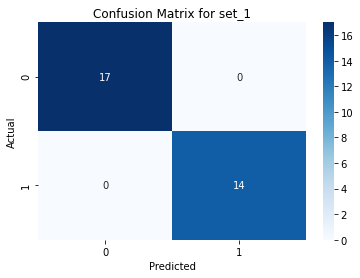

In [211]:
# Evaluation measures and classification report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plotconfmat(tree, X_te_set):
    y_pred = tree.predict(X_te_set)
    cmat = confusion_matrix(y_test, y_pred)

    sns.heatmap(cmat, annot=True, cmap='Blues')
    plt.title("Confusion Matrix for set_1")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
plotconfmat(clf,X_test)

### Q12. Which out of the two classifiers performs better.

In [232]:
# Name of the classifier with accuracy value.
from sklearn.metrics import accuracy_score as asc
print("Accuracy on Decision tree:",asc(y_test, clf.predict(X_test)))

Accuracy on Decision tree: 1.0
